In [1]:
import warnings

def function_that_warns():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    function_that_warns()  # this will not show a warning

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#importing pandas
import pandas as pd
import os

In [4]:
# reading in data
tweets = pd.read_csv('cleaned_tweet_df.csv')

In [5]:
# checking the dataframe
tweets

,created_at,source,original_text,cleaned_text,extra_clean_text,sentiment,polarity,subjectivity,lang,favorite_count,...,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,score,scoremap
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...","🚨Africa is ""in the midst of a full-blown third...","🚨africa is ""in the midst of a full-blown third...","Sentiment(polarity=0.16666666666666666, subjec...",0.166667,0.188889,en,548.0,...,204051,551.0,351.0,NaN,NaN,TelGlobalHealth,Mass,NaN,positive,1
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,"Dr Moeti is head of WHO in Africa, and one of ...",dr moeti is head of who in africa and one of t...,"Sentiment(polarity=0.13333333333333333, subjec...",0.133333,0.455556,en,195.0,...,3462,66.0,92.0,NaN,NaN,globalhlthtwit,"Edinburgh, Scotland",NaN,positive,1
2,2021-06-18 17:56:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @NHSRDForum: Thank you @research2note for c...,Thank you @research2note for creating this ama...,thank you research2note for creating this amaz...,"Sentiment(polarity=0.3166666666666667, subject...",0.316667,0.483333,en,2.0,...,6727,1195.0,1176.0,NaN,red4research,NHSRDForum,NaN,NaN,positive,1
3,2021-06-18 17:56:10+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @HighWireTalk: Former Pfizer VP and Virolog...,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp and virologist dr michael yea...,"Sentiment(polarity=0.08611111111111111, subjec...",0.086111,0.197222,en,1580.0,...,45477,2666.0,2704.0,NaN,NaN,HighWireTalk,NaN,NaN,positive,1
4,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,I think it’s important that we don’t sell COVA...,i think it’s important that we don’t sell cova...,"Sentiment(polarity=0.27999999999999997, subjec...",0.280000,0.620000,en,72.0,...,277957,28250.0,30819.0,NaN,NaN,PeterHotez,United Kingdom,NaN,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,2021-06-19 07:40:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @pseudofijian: Australia is sending vaccine...,Australia is sending vaccines.\nAustralia is s...,australia is sending vaccines\naustralia is se...,"Sentiment(polarity=0.1, subjectivity=0.4)",0.100000,0.400000,en,78.0,...,5591,1577.0,538.0,NaN,NaN,pseudofijian,Fiji,NaN,positive,1
3350,2021-06-19 07:40:29+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @edendomain: The Truth Behind COVID-19 Vacc...,The Truth Behind COVID-19 Vaccines (6) —— Bell...,the truth behind covid-19 vaccines (6) —— bell...,"Sentiment(polarity=-0.38611111111111107, subje...",-0.386111,0.622222,en,2.0,...,9161,697.0,303.0,NaN,DrLiMengYan,edendomain,"Osaka-shi Chuo, Osaka",NaN,negative,0
3351,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @N_RamchanderRao: Covid19 vaccines reach th...,Covid19 vaccines reach the remotest places of ...,covid19 vaccines reach the remotest places of ...,"Sentiment(polarity=-0.05, subjectivity=0.4)",-0.050000,0.400000,en,113.0,...,778,410.0,483.0,NaN,NaN,N_RamchanderRao,"Jehanabad, India",NaN,negative,0
3352,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @HighWireTalk: Former Pfizer VP and Virolog...,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp and virologist dr michael yea...,"Sentiment(polarity=0.08611111111111111, subjec...",0.086111,0.197222,en,1595.0,...,39413,2224.0,2739.0,NaN,NaN,HighWireTalk,"The boro, MA",NaN,positive,1


In [6]:
# Checking what the cleaned_text column looks like 
tweets.extra_clean_text

0       🚨africa is "in the midst of a full-blown third...
1       dr moeti is head of who in africa and one of t...
2       thank you research2note for creating this amaz...
3       former pfizer vp and virologist dr michael yea...
4       i think it’s important that we don’t sell cova...
                              ...                        
3349    australia is sending vaccines\naustralia is se...
3350    the truth behind covid-19 vaccines (6) —— bell...
3351    covid19 vaccines reach the remotest places of ...
3352    former pfizer vp and virologist dr michael yea...
3353    "africa needs millions more doses here &amp no...
Name: extra_clean_text, Length: 3354, dtype: object

### Exploratory Analysis

In [7]:
# Importing the wordcloud library
from wordcloud import WordCloud

In [8]:
# Joining the different processed titles together.
long_string = ','.join(list(tweets['extra_clean_text'].values))

In [9]:
# Creating a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [10]:
# Generating a word cloud
wordcloud.generate(long_string)

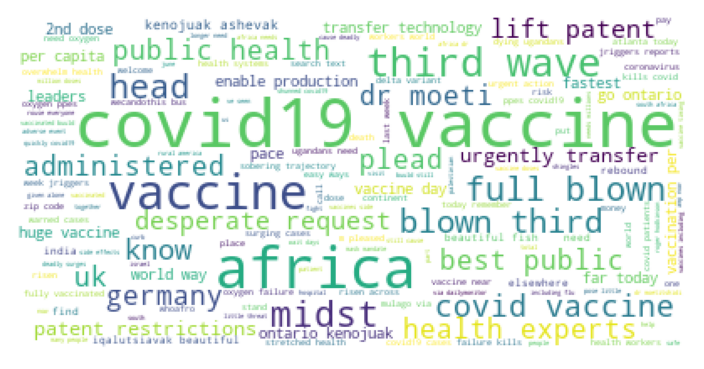

In [11]:
# Opening a plot of the generated image.
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3), dpi = 173)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Preparing text for LDA Analysis

In [12]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [13]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [14]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [15]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

In [16]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets['extra_clean_text'] )

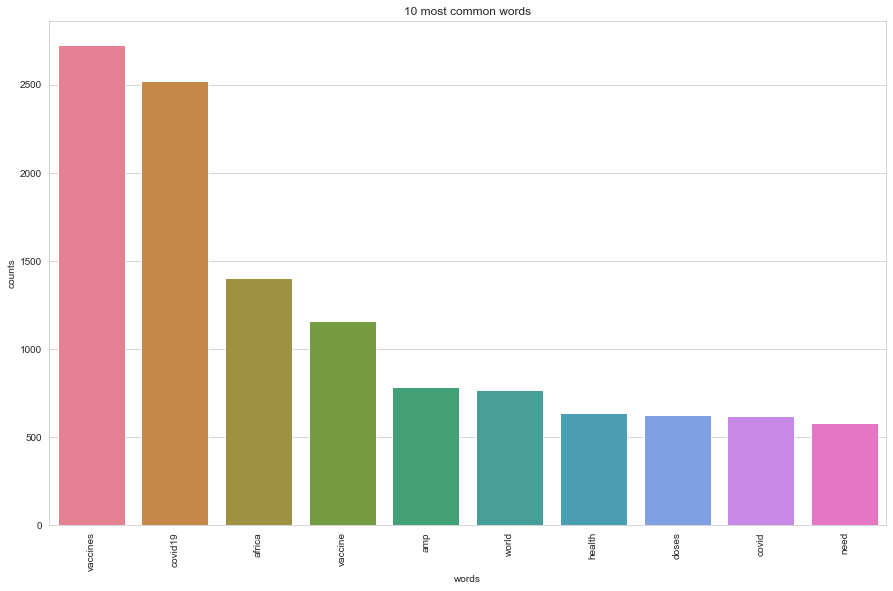

In [17]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Tokenizing The Text and Removing Stopwords

In [18]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','need', 'also'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = tweets.extra_clean_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['africa', 'midst', 'full', 'blown', 'third', 'wave', 'coronavirus', 'head', 'whoafro', 'warned', 'cases', 'risen', 'across', 'continent', 'deaths', 'risen', 'last', 'week', 'jriggers', 'reports']


### Converting The Tokenized Object Into A Corpus And Dictionary

In [19]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


### LDA model training

In [20]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.047*"covid" + 0.031*"vaccines" + 0.019*"vaccine" + 0.013*"today" + '
  '0.012*"welcome" + 0.011*"near" + 0.011*"search" + 0.011*"wecandothis" + '
  '0.011*"text" + 0.011*"zip"'),
 (1,
  '0.055*"vaccines" + 0.038*"covid" + 0.021*"vaccine" + 0.017*"amp" + '
  '0.016*"africa" + 0.014*"one" + 0.011*"get" + 0.009*"people" + 0.008*"know" '
  '+ 0.008*"public"'),
 (2,
  '0.037*"covid" + 0.034*"vaccines" + 0.016*"vaccine" + 0.014*"africa" + '
  '0.013*"cases" + 0.011*"amp" + 0.011*"open" + 0.010*"new" + 0.010*"health" + '
  '0.010*"palestinians"'),
 (3,
  '0.062*"covid" + 0.041*"vaccines" + 0.029*"world" + 0.017*"oxygen" + '
  '0.014*"india" + 0.012*"new" + 0.012*"amp" + 0.010*"one" + 0.010*"workers" + '
  '0.010*"health"'),
 (4,
  '0.047*"covid" + 0.033*"vaccines" + 0.014*"health" + 0.012*"people" + '
  '0.011*"australia" + 0.011*"vaccinated" + 0.010*"cases" + 0.010*"everyone" + '
  '0.010*"wave" + 0.010*"africa"'),
 (5,
  '0.048*"africa" + 0.033*"covid" + 0.026*"vaccines" + 0.017*"

### Analyzing LDA model results

In [21]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if True:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.152094  0.099375       1        1  19.486735
1     -0.051609  0.118238       2        1  15.665806
3      0.073747 -0.070630       3        1  11.322392
4      0.051023 -0.101552       4        1  10.629902
0      0.084383 -0.065663       5        1   9.143915
2     -0.045702 -0.016744       6        1   8.226749
7      0.132261  0.064027       7        1   8.033099
8     -0.176500 -0.131703       8        1   6.358722
9      0.039161  0.012213       9        1   5.605568
6      0.045330  0.092438      10        1   5.527112, topic_info=        Term         Freq        Total Category  logprob  loglift
13     risen   237.000000   237.000000  Default  30.0000  30.0000
1     africa  1321.000000  1321.000000  Default  29.0000  29.0000
8       head   311.000000   311.000000  Default  28.0000  28.0000
11     midst   348.000000   348.000000  Default  27.0000  27.0000
67     covid  2992.000000  2992.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
119  welcome    18.202574   178.680449  Topic10  -5.4174   0.6115
6     deaths    18.537460   264.569066  Topic10  -5.3991   0.2372
576  ontario    18.972193   383.661122  Topic10  -5.3760  -0.1113
151      new    17.269832   257.581195  Topic10  -5.4700   0.1931
436     dose    16.451769   147.320272  Topic10  -5.5185   0.7033

[738 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1579      1  0.064751  according
1579      2  0.064751  according
1579      3  0.064751  according
1579      5  0.064751  according
1579      6  0.032375  according
...     ...       ...        ...
120       4  0.007232        zip
120       5  0.535174        zip
120       6  0.094017        zip
120       8  0.043392        zip
120       9  0.065089        zip

[2574 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 4, 5, 1, 3, 8, 9, 10, 7])

### Sentiment Analysis (Model Building)

In [23]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

C:\Users\Alt\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# importing necessary modules
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [25]:
# setting feature
X = tweets['extra_clean_text'].values

In [26]:
# setting target
y = tweets['scoremap'].values

In [27]:
# splittng dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2515,)
(839,)
(2515,)
(839,)


In [28]:
# initializing vectorizer
trigram_vectorizer = CountVectorizer(ngram_range=(3,3))

In [29]:
# fitting and transforming train set
trigram_train = trigram_vectorizer.fit_transform(X_train)

In [30]:
# transforming the test set
trigram_test = trigram_vectorizer.transform(X_test)

In [31]:
# initializing classifier
sgdc = SGDClassifier()

In [32]:
# fitting on the model
sgdc.fit(trigram_train,y_train)

SGDClassifier()

In [33]:
# predicting on transformed test set
y_pred=sgdc.predict(trigram_test)

### Model Evaluation

In [34]:
# accuracy score
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.9%


In [35]:
# precision score
score=precision_score(y_test,y_pred)
print(f'Precision_Score: {round(score*100,2)}%')

Precision_Score: 96.39%


In [36]:
# recall score
score=recall_score(y_test,y_pred)
print(f'Recall_Score: {round(score*100,2)}%')

Recall_Score: 100.0%


In [37]:
# f1 score
score=f1_score(y_test,y_pred)
print(f'F1_Score: {round(score*100,2)}%')

F1_Score: 98.16%
